In [1]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
file = '배우리프로.json' # Youtube로부터 8/3일 데이터 읽어옴
data = None
with open(file, 'r') as f:
    data=json.load(f)

channel_id, stats = data.popitem()

print(channel_id, '누적뷰: ' + stats['channel_statistics']['viewCount'], 
      '가입자수: ' + stats['channel_statistics']['subscriberCount'] )

UCeJaY6g-MMuVPGSsYg5NhXQ 누적뷰: 5214849 가입자수: 37300


In [3]:
video_stats = stats['video_data']

In [4]:
video_data = []
for vid in video_stats.items():
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    dislikes = int(vid[1]['dislikeCount'])
    # comments = int(vid[1]['commentCount'])
    release = vid[1]['publishedAt']
    video_data.append([title, views, likes, dislikes, release])

In [5]:
video = pd.DataFrame(video_data, columns=['title','viewCount', 'likeCount', 'dislikeCount', 'release'])
video['release'] = video['release'].apply(lambda x: x[:10])

In [6]:
video.set_index('title', inplace=True)

In [7]:
video.sort_values(by='viewCount', ascending=False)

video['release'] = pd.to_datetime(video['release'])

## 조회수 기준 상위 30 동영상 제목

In [8]:
video.sort_values('viewCount', ascending=False).head(30) # 161개 비디오 중 누적 뷰 상위 30개만 디스플레이

,viewCount,likeCount,dislikeCount,release
title,,,,
잘못된 공 위치 때문에 스윙이 망가질 수 있다는 사실을 아시나요? / 공위치 / 7번아이언 / 피칭,559207,5106,335,2019-12-15
백스윙에 대한 고민이 있는 골퍼를 위한 완벽한 영상 / 골프레슨 / 세개의기준,392051,7141,224,2019-12-05
[자막] 진짜로 힘을 빼고 쳐야 멀리갑니다 | 아직도 멀리치려고 용쓰신다면 이 영상을 보시고 잘 생각해보세요,266003,3701,136,2020-05-12
골프 힘빼기 어려우시죠? 이 영상 한편으로 완전히 해결해 드립니다.,232072,3212,109,2020-02-18
아이언 잘 치는 방법 두번째 (알고 찍어치기),226049,3028,110,2019-12-19
단언컨대 최고의 백스윙 연습방법입니다,162288,2007,68,2019-12-13
"[자막] 숏퍼터를 확실하게 성공하는 최고의 방법 | ""헤확때""",143781,1988,55,2020-05-18
힘을 빼고 스윙 하고 싶다면 꼭 봐야 할 영상입니다. [힘 빠지시는분은 클릭 금지] / 골프레슨 / 배우리프로,141369,1832,78,2019-11-23
어드레스시 헤드를 잘 놓아야 골프가 쉬워진다,141000,1984,47,2020-02-03


In [9]:
video['viewCount/day'] = video['viewCount'] / ((pd.to_datetime('today') - video['release']).dt.days)
video['viewCount/day'] = video['viewCount/day'].astype('int')

## 일평균 조회수 기준 상위 30위 (등록일 보정)

In [10]:
video.sort_values('viewCount/day', ascending=False).head(30) # 161개 비디오중 일 뷰 상위 30개만 디스플레이

,viewCount,likeCount,dislikeCount,release,viewCount/day
title,,,,,
[자막] 리듬감의 끝판왕이 나타났다 | 실제 유명 댄서들이 리듬감을 익히는 방법입니다,18955,494,4,2020-07-31,6318
[자막] 끌고 내려오면 안된다 | 끌고 내려와서 힘이 들어간다.,35992,568,7,2020-07-28,5998
[자막] 진짜로 힘을 빼고 쳐야 멀리갑니다 | 아직도 멀리치려고 용쓰신다면 이 영상을 보시고 잘 생각해보세요,266003,3701,136,2020-05-12,3204
잘못된 공 위치 때문에 스윙이 망가질 수 있다는 사실을 아시나요? / 공위치 / 7번아이언 / 피칭,559207,5106,335,2019-12-15,2410
[자막]비거리가 줄었다면? 공을 멀리치고 싶다면 알고 있어야 하는 사실,19931,312,6,2020-07-25,2214
"[자막] 숏퍼터를 확실하게 성공하는 최고의 방법 | ""헤확때""",143781,1988,55,2020-05-18,1867
[자막수정] 다운블로우를 느낄 수 있는 가장 확실한 연습방법 | 걷어친다면 꼭 연습해보세요,133382,1507,37,2020-05-22,1827
백스윙에 대한 고민이 있는 골퍼를 위한 완벽한 영상 / 골프레슨 / 세개의기준,392051,7141,224,2019-12-05,1620
[자막] 오른손 그립을 제대로 잡아야 공을 컨트롤 할 수 있다,27398,427,10,2020-07-16,1522


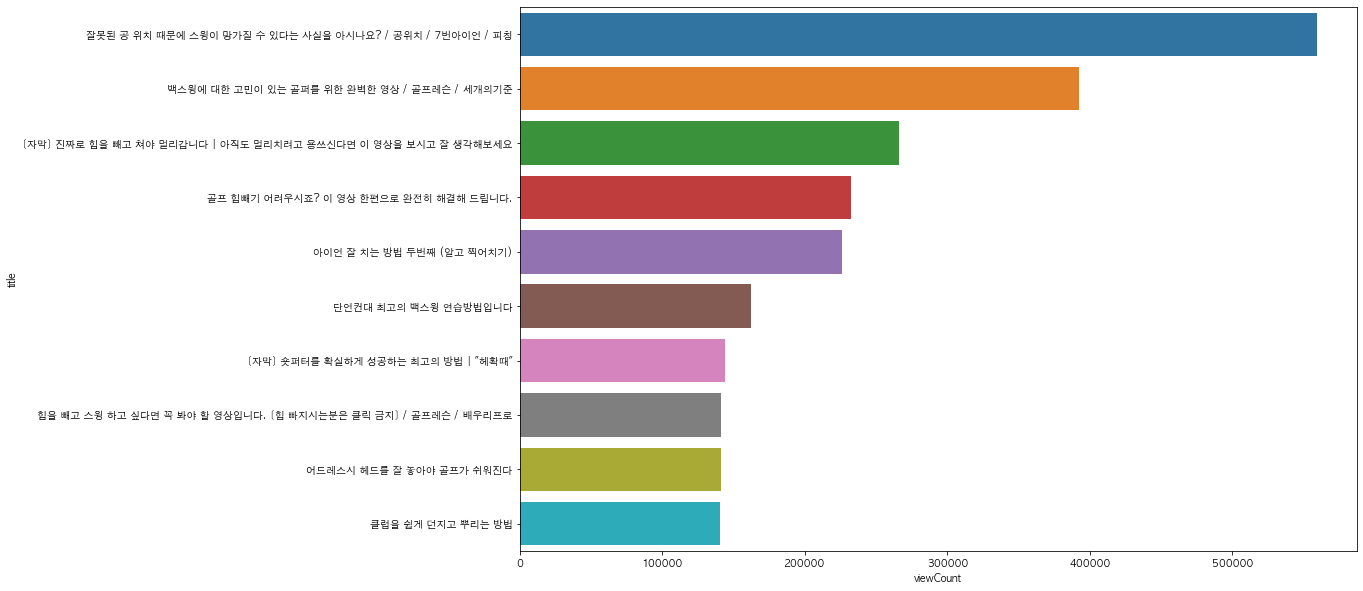

In [11]:
plt.figure(figsize=(15,10))
video_reset_index = video.reset_index()
sns.barplot(x='viewCount', y='title', data=video_reset_index.sort_values('viewCount', ascending=False)[:10])

In [12]:
df = video.reset_index()
df = df[['title', 'viewCount']].sort_values('viewCount', ascending=False)

In [13]:
import re
df['refined'] = df['title'].apply(lambda x:re.sub('[^가-힣\s0-9]', '', x))

In [14]:
sentences = df['refined'].values
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.135 Gb
all cohesion probabilities was computed. # words = 0
all branching entropies was computed # words = 336
all accessor variety was computed # words = 336


In [15]:
from soynlp.tokenizer import LTokenizer
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [16]:
df['tokenized'] = df['refined'].apply(lambda x:tokenizer.tokenize(x,remove_r=True))

In [17]:
#20% 
thresh = int(len(df) *0.2)
df20 = df[:thresh]

In [18]:
words = []
for i in df20['tokenized']:
    for k in i:
        words.append(k)

In [19]:
from collections import Counter
count = Counter(words)
word_dict = dict(count)

## 채널별 상위 20%에 많이 등장하는 단어

In [20]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

골프레슨 9
방법 7
잘 6
최고의 5
어프로치 5
수 4
자막 4
치는 3
백스윙 3
꼭 3
연습방법 3
있는 2
영상 2
힘을 2
빼고 2
이 2
아이언 2
배우리프로 2
쉽게 2
가장 2
하체를 2
쓰는 2
하체리드 2
마스터하기 2
딱 2
있다 2
모든 2
잘못된 1
공 1
위치 1
때문에 1
스윙이 1
망가질 1
있다는 1
사실을 1
아시나요 1
공위치 1
7번아이언 1
피칭 1
백스윙에 1
대한 1
고민이 1
골퍼를 1
위한 1
완벽한 1
세개의기준 1
진짜로 1
쳐야 1
멀리갑니다 1
아직도 1
멀리치려고 1
용쓰신다면 1
영상을 1
보시고 1
생각해보세요 1
골프 1
힘빼기 1
어려우시죠 1
한편으로 1
완전히 1
해결해 1
드립니다 1
두번째 1
알고 1
찍어치기 1
단언컨대 1
연습방법입니다 1
숏퍼터를 1
확실하게 1
성공하는 1
헤확때 1
스윙 1
하고 1
싶다면 1
봐야 1
할 1
영상입니다 1
힘 1
빠지시는분은 1
클릭 1
금지 1
어드레스시 1
헤드를 1
놓아야 1
골프가 1
쉬워진다 1
클럽을 1
던지고 1
뿌리는 1
백스윙이 1
급한 1
이유 1
많은 1
골퍼들이 1
급하고 1
빠른 1
백스윙을 1
고치고 1
싶어한다 1
자막수정 1
다운블로우를 1
느낄 1
확실한 1
걷어친다면 1
연습해보세요 1
슬라이스는 1
가고 1
드라이버 1
감은 1
온다 1
슬라이스교정 1
드라이버잘치는방법 1
볼스트라이커 1
벤호건이 1
즐겨하는 1
너무 1
당연해서 1
지키지 1
않는 1
것들 1
이것만 1
잘해도 1
귀신 1
될 1
있습니다 1
실력에 1
따라 1
우드를 1
2가지 1
공을 1
맞추느냐 1
맞추지 1
못하느냐 1
다운스윙시 1
네가지 1
체중이동 1
다운스윙 1
골프에서 1
쉬운게 1
멀리치는 1
것이다 1
두가지만 1
있으면 1
누구나 1
멀리칠 1
그린주변 1
하는 1
뒷땅탑볼방지 1
및 1
좋지 1
않은 1
라이에서 1
해결책 1
그린 1
주변 1
짧은 1
거리 1
초보골프레슨 1
제대로 1
끌고내려오자 1
손목 1
끌고 1